## Python imports
We shall use the `Sympy` package to perform the symbolic computations.

In [1]:
import sympy
sympy.init_printing(use_unicode=False, wrap_line=False)

## Define Sympy symbols, Van de Vusse kinetics and DSR mixing point

In [2]:
cA,cB,cC,cD = sympy.symbols('c_A, c_B, c_C, c_D')
cA0,cB0,cC0,cD0 = sympy.symbols('c_A0, c_B0, c_C0, c_D0')

#3D Van de Vusse kinetics
k1=1
k2=1
k3=10
rA = -k1*cA - 2*k3*(cA**2)
rB = k1*cA - k2*cB
rC = k2*cB
rD = k3*(cA**2)

#rate vector and mixing vector
r = sympy.Matrix([rA, rB, rD])
C = sympy.Matrix([cA, cB, cD])
# C0 = sympy.Matrix([1, 0, 0])
C0 = sympy.Matrix([cA0, cB0, cD0])

#mixing vector
v = C - C0

## Normal vector: n

The expression for $ \mathbf{n}\left(\mathbf{C}\right) $ is given by
$$ \mathbf{n}\left(\mathbf{C}\right) = \mathbf{v}\left(\mathbf{C}\right) \times \mathbf{r}\left(\mathbf{C}\right) $$

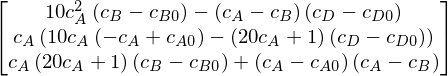

In [3]:
n = sympy.simplify(v.cross(r)) #v x r (not r x v!!)
n

## Jacobian matrix: $\mathrm{d}\mathbf{r}\left(\mathbf{C}\right)$

Next, the Jacobian matrix of $\mathbf{r}\left(\mathbf{C}\right)$, $\mathrm{d}\mathbf{r}\left(\mathbf{C}\right)$, is found:

$$ \mathrm{d}\mathbf{r}\left(\mathbf{C}\right)=\begin{bmatrix}\frac{\partial\mathrm{r_{A}}\left(\mathbf{C}\right)}{\partial\mathrm{c_{A}}} & \cdots & \frac{\partial\mathrm{r_{A}}\left(\mathbf{C}\right)}{\partial\mathrm{c}_{n}}\\
\vdots & \ddots & \vdots\\
\frac{\partial\mathrm{r}_{n}\left(\mathbf{C}\right)}{\partial\mathrm{c_{A}}} & \cdots & \frac{\partial\mathrm{r}_{n}\left(\mathbf{C}\right)}{\partial\mathrm{c}_{n}}
\end{bmatrix} $$

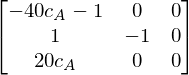

In [4]:
dr = r.jacobian(sympy.Matrix([cA,cB,cD]))
dr

## Calculating $ \varphi\left( \mathbf{C} \right) $

We can calculate $\varphi\left(\mathbf{C}\right)$ from the expression:

$$ \varphi\left(\mathbf{C}\right) = \left[\mathrm{d}\mathbf{r}\left(\mathbf{C}\right).\mathbf{v}\left(\mathbf{C}\right)\right]^{\mathrm{T}}\mathbf{n}\left(\mathbf{C}\right) $$

In [5]:
phi = ((dr*v).T)*n

Sympy performs matrix algebra on `dr`, `v` and `n`, and although the result should be a scalar quantity, it outputs the result as a 1x1 matrix. We need to extract this element using `phi[0]` (which is Python notation for accessing the first element in the 1x1 matrix `phi`).

In [6]:
phi = sympy.simplify(phi[0])
phi

## Simplifications

Notice that the expression for $\varphi\left(\mathbf{C}\right)$ is a function of all three components, $c_A$, $c_B$ and $c_D$, which makes the expression quite complex. We can, however, simplify the expression slightly.
From AR theory, we know that the value of $\varphi\left(\mathbf{C}\right)$ must remain at zero on the AR boundary. Thus, we can use the condition 

$$ \varphi\left(\mathbf{C}\right) = 0 $$

to solve for one of the components in the expression for $\varphi\left(\mathbf{C}\right)$, and then substitute the result back into the expression for $\alpha$ to simplify the expression slightly.

Hence, let us solve for $c_D$

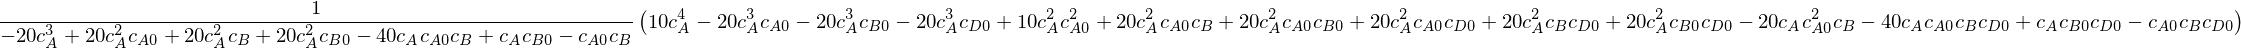

In [7]:
cD_fn = sympy.simplify(sympy.solve(phi,cD))[0]
cD_fn

## Calculating $ \nabla\varphi\left(\mathbf{C}\right) $

Next, we compute the vector $ \nabla\varphi\left(\mathbf{C}\right) $ by taking partial derivatives of $\varphi\left(\mathbf{C}\right)$ with respect to all components:

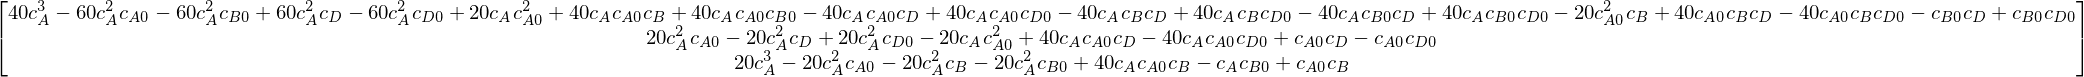

In [8]:
grad_phi = sympy.Matrix((sympy.diff(phi,cA), sympy.diff(phi,cB), sympy.diff(phi,cD)))
grad_phi = sympy.simplify(sympy.Matrix(1,3,grad_phi))
sympy.factor(grad_phi.T)

## Calculating $\alpha\left(\mathbf{C}\right)$

Next, we compute $\alpha\left(\mathbf{C}\right)$ from
$$ \alpha\left(\mathbf{C}\right)=\frac{\left[\nabla\varphi\left(\mathbf{C}\right)\right]^{\mathrm{T}}\mathbf{r}\left(\mathbf{C}\right)}{\left[\nabla\varphi\left(\mathbf{C}\right)\right]^{\mathrm{T}}\mathbf{v}\left(\mathbf{C}\right)} $$

For clarity, we shall split the expression for $\alpha\left(\mathbf{C}\right)$ into separate numerator and denominator expressions.

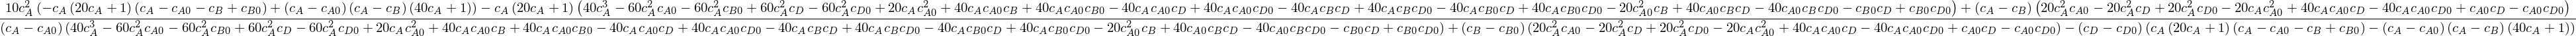

In [9]:
top_expr = (grad_phi*r)[0]
bot_expr = (grad_phi*v)[0]

alpha = sympy.simplify(top_expr/bot_expr)
alpha

This is a rather complex function. We can simplify it slightly by substituting in the function for $c_D$, solved for eariler, and simplify, which results in an expression that is a function of $c_A$ and $c_B$ only. (This is unique for the Van de Vusse system, and this simplification will not work for all systems, but it is useful if it can be exploited.)

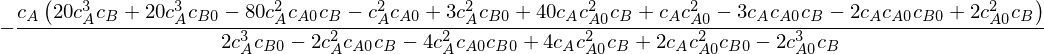

In [10]:
alpha = sympy.simplify(alpha.subs(cD, cD_fn))
alpha

which is our final expression for $\alpha\left(\mathbf{C}\right)$ in terms of the specified mixing vector

In [11]:
print sympy.python(alpha)

c_A = Symbol('c_A')
c_B = Symbol('c_B')
c_B0 = Symbol('c_B0')
c_A0 = Symbol('c_A0')
e = -c_A*(20*c_A**3*c_B + 20*c_A**3*c_B0 - 80*c_A**2*c_A0*c_B - c_A**2*c_A0 + 3*c_A**2*c_B0 + 40*c_A*c_A0**2*c_B + c_A*c_A0**2 - 3*c_A*c_A0*c_B - 2*c_A*c_A0*c_B0 + 2*c_A0**2*c_B)/(2*c_A**3*c_B0 - 2*c_A**2*c_A0*c_B - 4*c_A**2*c_A0*c_B0 + 4*c_A*c_A0**2*c_B + 2*c_A*c_A0**2*c_B0 - 2*c_A0**3*c_B)
